In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


ROOT_DIR = Path().absolute().parent
DATA_FOLDER = ROOT_DIR / "data"
ETL_FOLDER = ROOT_DIR / "data"

In [53]:
# get all files from the data folder
dfs_data = []
for file in DATA_FOLDER.glob("data_*.csv"):
    df = pd.read_csv(file)
    df["source"] = "origin"
    df["date"] = pd.to_datetime(df["date"])
    dfs_data.append(df)

#get all files from the etl folder
for file in ETL_FOLDER.glob("data_*.csv"):
    df = pd.read_csv(file)
    df["source"] = "etl"
    df["date"] = pd.to_datetime(df["date"])
    dfs_data.append(df)
df_data = pd.concat(dfs_data, ignore_index=True)

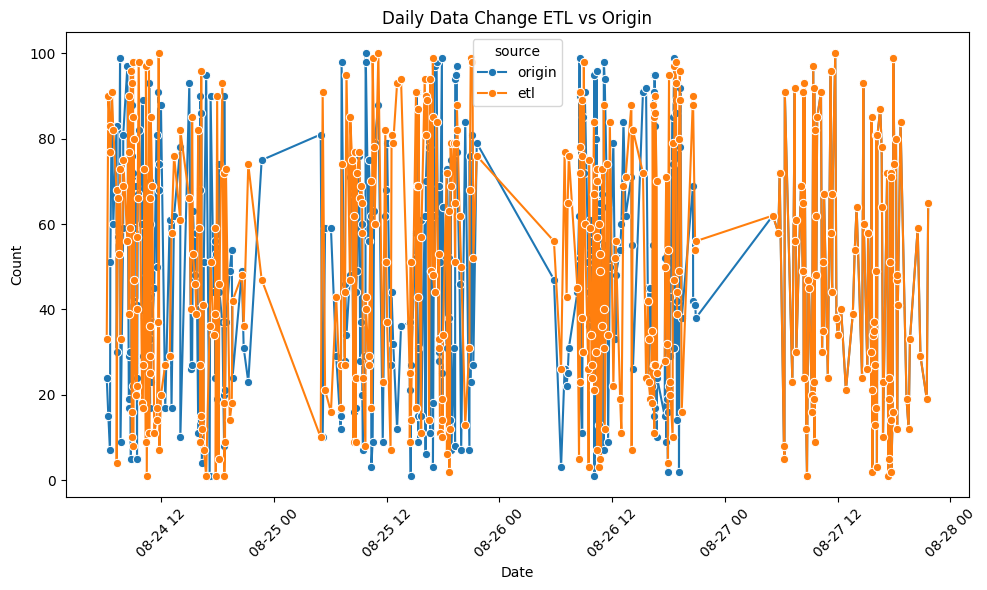

In [54]:

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_data, x="date", y="count", hue="source", marker="o")

plt.title("Daily Data Change ETL vs Origin")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()